## Set google drive

In [0]:
google_drive = True

## Import necessary modules

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

if google_drive:
    from google.colab import drive
    drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Read and show the image

(690, 550, 3)

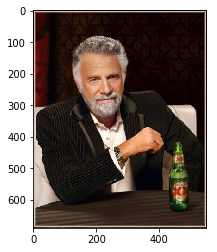

In [3]:
path = ''
if google_drive:
    path = '/content/drive/My Drive/Μηχανική Μάθηση/projectb/'

img = mpimg.imread(path + 'im.jpg')
plt.imshow(img)
img.shape

## Reshape the image and normalize our data

In [4]:
width = img.shape[0]
height = img.shape[1]

N = width * height

# D = 3 (R, G, B)
D = img.shape[2]

# Copy img array to a X array
X = np.copy(img)

# (0,   0,   0)   - Black
# (255, 255, 255) - White
X = img.reshape((N, D))

# (0, 0, 0) - Black
# (1, 1, 1) - White
X = X / 255

X.shape

(379500, 3)

## Initialize parameters

In [0]:
K = 2

P = np.random.rand(K)
S = np.random.rand(K)
M = np.random.rand(K, D)

## Calculate Likelihood

In [0]:
# likelyhood
def calculate_LH():
    
    LH = np.zeros((N, K))

    for k in range(K):
        # X_Mk holds the distance of each pixel from Mk (dimensions N x D)
        X_Mk = (X - M[k]) ** 2

        exponent = (-1 / (2 * S[k])) * X_Mk

        # arr has N x D dimensions like X_Mk (we have scalar multiply)
        arr = (1 / np.sqrt(2 * np.pi * S[k])) * np.exp(exponent)

        # arr now has N x 1 dimensions (we multiply the elements in each row)
        arr = P[k] * np.prod(arr, axis = 1)

        LH[:, k] = arr
    
    return np.sum(LH)

## Define Gaussian distribution

In [0]:
def calculate_gaussian():
    
    Gaussian = np.zeros((N, K))
    
    for k in range(K):
        X_Mk = (X - M[k]) ** 2
        
        exponent = (-1 / (2 * S[k])) * X_Mk
        
        # arr is N x K matrix
        arr = ((1 / np.sqrt(2 * np.pi * S[k])) * np.exp(exponent))
        
        # we multiply the elements of each row
        # the result is the k-th column of Gaussian matrix
        Gaussian[:, k] = np.prod(arr, axis = 1)
    
    return Gaussian

## Calculate γ(znk)

In [0]:
def calculate_GZ():
    
    GZ = np.zeros((N, K))
    
    Gaussian = calculate_gaussian()
    
    for n in range(N):
        for k in range(K):
            GZ[n][k] = P[k] * Gaussian[n][k] / np.sum(P[k] * Gaussian[n])
    
    return GZ

## Visualize the K means

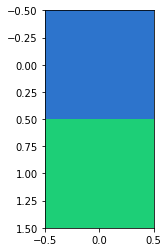

In [9]:
if K == 2:
    plt.imshow((M * 255).astype(np.uint8).reshape((2, 1, 3)))
else:
    n = int(np.sqrt(K))
    plt.imshow((M * 255).astype(np.uint8).reshape((n, n, 3)))

## Visualize the image after Expectation

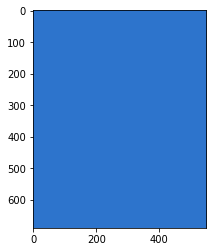

In [10]:
new_img = (M[np.argmax(calculate_GZ(), axis=1)] * 255).astype(np.uint8)
plt.imshow(new_img.reshape((width, height, 3)))

## Calculate new μ, Σ, π

In [0]:
def calculate_new_params(GZ):
    
    M_new = np.zeros((K, D))
    
    S_new = np.zeros(K)
    
    P_new = np.zeros(K)
    
    for k in range(K):
        # update M
        M_new[k] = np.dot(GZ[:, k], X) / np.sum(GZ, axis = 0)[k]
        
        sum_GZk = np.sum(GZ[k])
        
        # update S
        S_new[k] = np.sum(np.dot(GZ[:, k], (X - M_new[k]) ** 2)) / (D * sum_GZk)
        
        # update P
        P_new[k] = sum_GZk / N
    
    return M_new, S, P

## Calculate Error

In [0]:
def error(Xtrue, Xreconstructed):
    return np.sum((Xtrue - Xreconstructed) ** 2) / N

## Run model

Iteration 0:


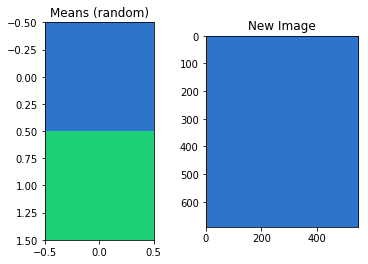

error = 0.6750343436369614
Likelihood difference: 43419.45843229261
_______________________________________________
Iteration 1:


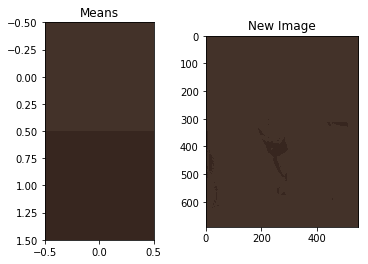

error = 0.17918560213235094
Likelihood difference: 141593.19439136516
_______________________________________________
Iteration 2:


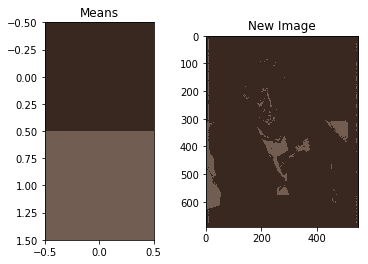

error = 0.13398022161335532
Likelihood difference: 8032.540634769044
_______________________________________________
Iteration 3:


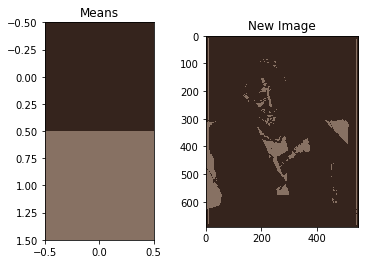

error = 0.11276902648672163
Likelihood difference: 2173.5698647653626
_______________________________________________
Iteration 4:


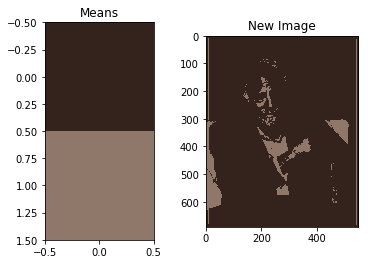

error = 0.10616648624553542
Likelihood difference: 605.2513167964062
_______________________________________________
Iteration 5:


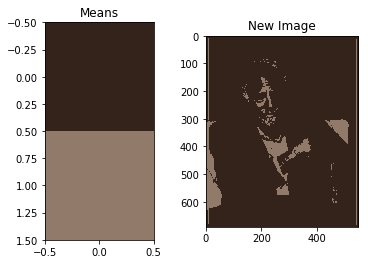

error = 0.1041292122063117
Likelihood difference: 176.79571130048134
_______________________________________________
Iteration 6:


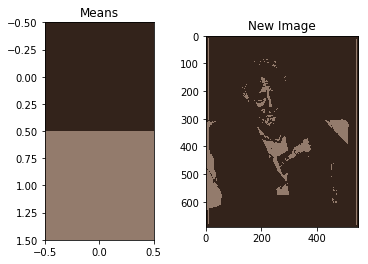

error = 0.10328655935008273
Likelihood difference: 53.57483735808637
_______________________________________________
Iteration 7:


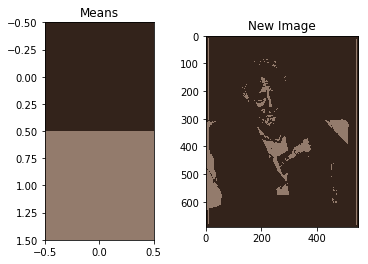

error = 0.10323485243083258
Likelihood difference: 16.56301989997155
_______________________________________________
Iteration 8:


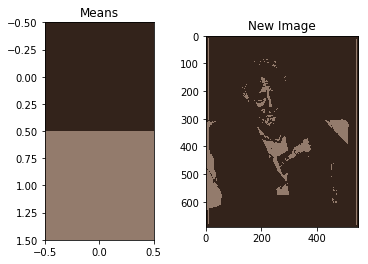

error = 0.10322246566765897
Likelihood difference: 5.170263228414115
_______________________________________________
Iteration 9:


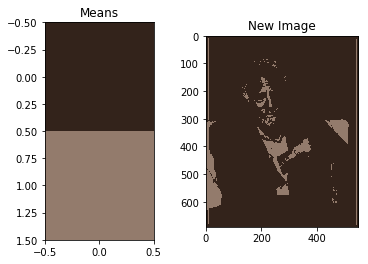

error = 0.10318278185293077
Likelihood difference: 1.620860678900499
_______________________________________________
Iteration 10:


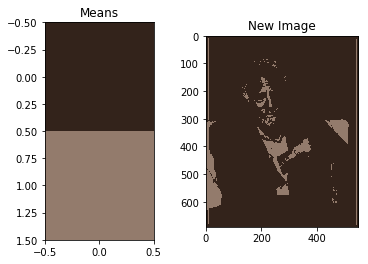

error = 0.10318278185293077
Likelihood difference: 0.5090410453849472
_______________________________________________
Iteration 11:


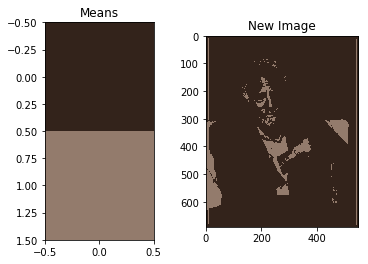

error = 0.10318278185293077
Likelihood difference: 0.15998074060189538
_______________________________________________
Iteration 12:


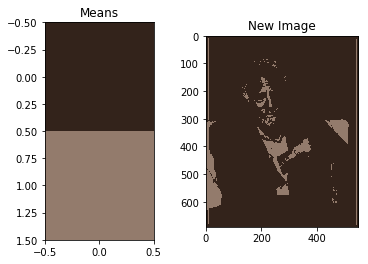

error = 0.10318278185293077
Likelihood difference: 0.05029227101476863
_______________________________________________
Iteration 13:


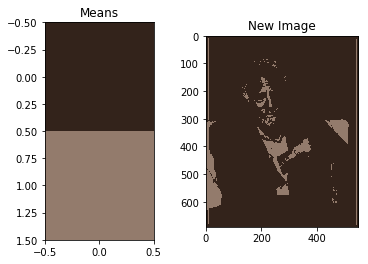

error = 0.10318278185293077
Likelihood difference: 0.01581173317390494
_______________________________________________
Iteration 14:


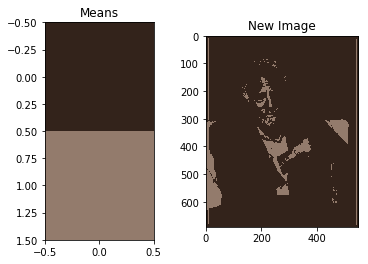

error = 0.10318278185293077
Likelihood difference: 0.004971340444171801
_______________________________________________
Iteration 15:


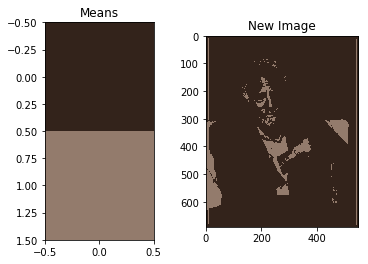

error = 0.10318278185293077
Likelihood difference: 0.001563054247526452
_______________________________________________
Iteration 16:


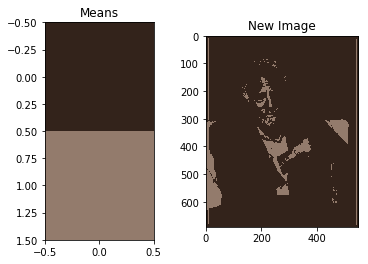

error = 0.10318278185293077
Likelihood difference: 0.0004914440796710551
_______________________________________________
Iteration 17:


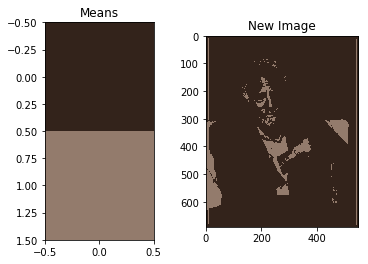

error = 0.10318278185293077
Likelihood difference: 0.0001545144768897444
_______________________________________________
Iteration 18:


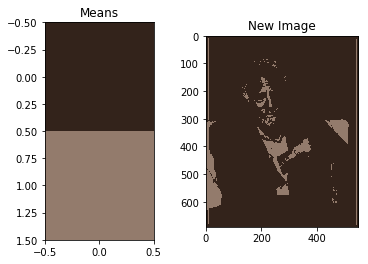

error = 0.10318278185293077
Likelihood difference: 4.858124884776771e-05
_______________________________________________
Iteration 19:


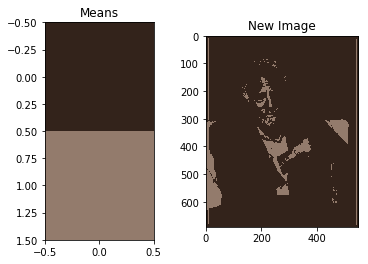

error = 0.10318278185293077
Likelihood difference: 1.5281984815374017e-05
_______________________________________________
Iteration 20:


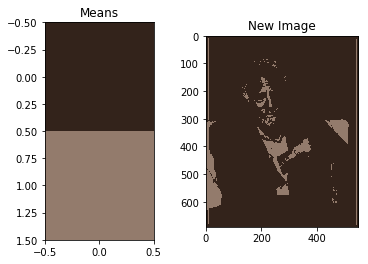

error = 0.10318278185293077
Likelihood difference: 4.803383490070701e-06
_______________________________________________
Iteration 21:


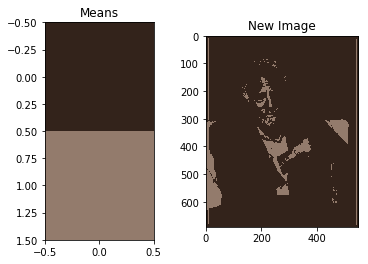

error = 0.10318278185293077
Likelihood difference: 1.5131954569369555e-06
_______________________________________________
Iteration 22:


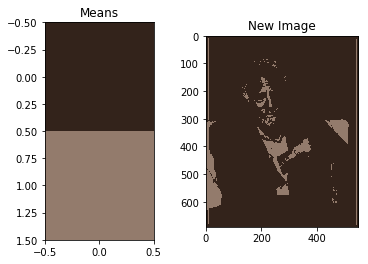

error = 0.10318278185293077
Likelihood difference: 4.752655513584614e-07
Likelihood difference is less than 1e-06, finished.
_______________________________________________


In [13]:
# We use this threshold for Likelihood difference
threshold = 1e-6

# Use this for the first iteration
LH_old = 0

convergence = False

max_iterations = 100
i = 0
while i < max_iterations and not convergence:
    
    # Expectation
    GZ = calculate_GZ()
    
    # We multiply with 255 and we set type to uint8 in order to read
    # our normalized data as pixels
    new_img = (M[np.argmax(GZ, axis=1)] * 255).astype(np.uint8)
    
    print('Iteration ', i, ':', sep = '')
    
    plt.subplot(1, 2, 1)
    if K == 2:
        plt.imshow((M * 255).astype(np.uint8).reshape((2, 1, 3)))
    else:
        n = int(np.sqrt(K))
        plt.imshow((M * 255).astype(np.uint8).reshape((n, n, 3)))
    txt = 'Means'
    if i == 0:
        txt += ' (random)'
    plt.title(txt)
    
    plt.subplot(1, 2, 2)
    plt.imshow(new_img.reshape((width, height, 3)))
    plt.title('New Image')
    
    plt.show()
    
    # Normalize the new image to [0..1]
    # and calculate the error
    print('error =', error(X, new_img / 255))
    
    # calculate new likelihood
    LH = calculate_LH()
    
    LH_diff = np.absolute(LH - LH_old)
    print('Likelihood difference:', LH_diff)
    
    if LH_diff < threshold:
        print('Likelihood difference is less than ', threshold,
              ', finished.', sep = '')
        convergence = True
    
    LH_old = LH
    
    # Maximization
    M, S, P = calculate_new_params(GZ)
    
    print('_______________________________________________')
    
    i += 1